In [1]:
import sys  
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib_inline
import matplotlib as mpl

sys.path.insert(0, '../../')
from statlearn.regression import LinearResgression

%matplotlib inline
%load_ext autoreload
%autoreload 2
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
mpl.rcParams['font.family'] = 'Latin Modern Math'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.linewidth'] = 1.5

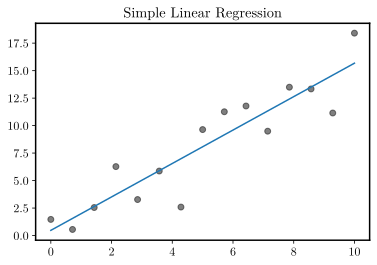

In [30]:
N = 15
X = np.linspace(0, 10, N)
y = X * 1.5 + norm.rvs(0, 2, N)

lm = LinearResgression()
y_pred = lm.fit_trasform(X, y, add_intercept=True)

fig, ax = plt.subplots()
ax.scatter(X, y, color='k', marker='o', alpha=0.5)
ax.plot(X, y_pred)
ax.set_title("Simple Linear Regression")
plt.show()

Text(0.5, 0.98, 'Multple Linear Regression')

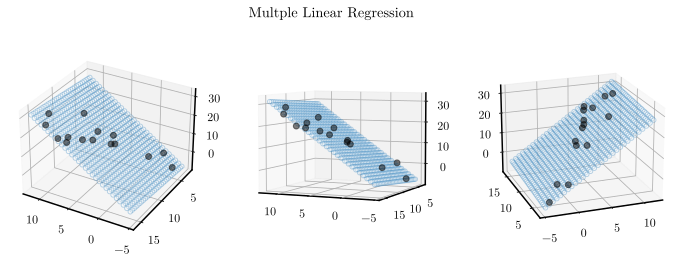

In [32]:
N = 15
X1 = np.linspace(0, 10, N) + norm.rvs(0, 2, N)
X2 = np.linspace(5, 15, N) + norm.rvs(0, 2, N)
X = np.column_stack([X1, X2])
y = 2 * X1 + 0.5 * X2 + norm.rvs(0, 2, N)

lm = LinearResgression()
y_pred = lm.fit_trasform(X, y, add_intercept=True)

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    xx1, xx2 = np.meshgrid(
        np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 30), 
        np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 30)
    )
    model_viz = np.array([xx1.flatten(), xx2.flatten()]).T
    predicted = lm.predict(model_viz, add_intercept=True)
    ax.plot(
        X1, X2, y, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5
    )
    ax.scatter(
        xx1.flatten(), xx2.flatten(), predicted, facecolor=(1, 1, 1, 1), 
        s=20, edgecolor='C0', alpha=0.3
    )
ax1.view_init(elev=30, azim=120)
ax2.view_init(elev=5, azim=114)
ax3.view_init(elev=20, azim=250)
fig.suptitle("Multple Linear Regression")

In [33]:
lm.beta

array([1.44466406, 2.17268225, 0.27132482])

## Regression by Successive Orthogonalization.

1. Initialize z0 = x0 = 1.
2. For j = 1,2,...,p
    Regress xj on z0, z1, . . . , , zj−1 to produce coefficients γˆlj =
    ⟨z ,x􏰈⟩/⟨z ,z ⟩, l = 0,...,j − 1 and residual vector z = ljll j
    xj − j−1 γˆkjzk.
    k=0
3. Regress y on the residual zp to give the estimate βˆp.

In [45]:
z0 = x0 = lm.train_X[:, 0]
x1 = lm.train_X[:, 1]
x2 = lm.train_X[:, 2]

gamma_00 = np.dot(x1, z0) / np.dot(z0, z0)
z1 = x1 - gamma_00 * z0

gamma_10 = np.dot(x2, z0) / np.dot(z0, z0)
gamma_11 = np.dot(x2, z1) / np.dot(z1, z1)
z2 = x2 - gamma_10 * z0 - gamma_11 * z1

beta2 = np.dot(z2, y) / np.dot(z2, z2)
beta2


0.27132481640080075

In [46]:
lm.beta

array([1.44466406, 2.17268225, 0.27132482])